In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data = scaler.transform(df)

In [14]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [19]:
# ITS PCA TIME 😎

In [20]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=3)

In [39]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca_data = pca.transform(scaled_data)

In [41]:
scaled_data.shape

(569, 30)

In [42]:
pca_data.shape

(569, 3)

Text(0, 0.5, '2nd Principal Component')

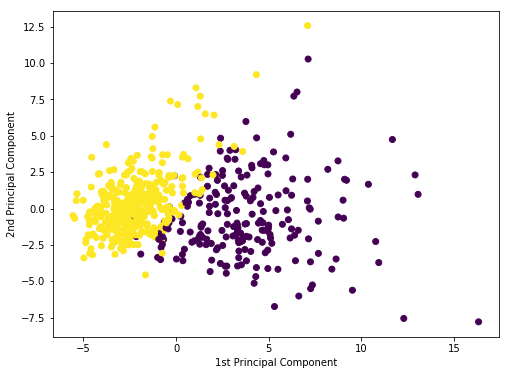

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=cancer['target'])
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

In [44]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611304,
         0.15189162,  0.06016536, -0.03476751,  0.19034878,  0.36657546,
        -0.10555215,  0.08997968, -0.08945723, -0.15229262,  0.20443045,
         0.23271592,  0.19720728,  0.13032155,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359318,  0.09796411, -0.00825725,  0.14188334,  0.27533946],
       [-0.0085312 ,  0.06454993, -0.00931417,  0.02869952, -0.10429154,
        -0.07409144,  0.00273372, -0.02556372, -0

In [45]:
df_components = pd.DataFrame(pca.components_, columns = cancer['feature_names'])

In [46]:
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074091,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236075,-0.173057,-0.170344,-0.271313,-0.232792


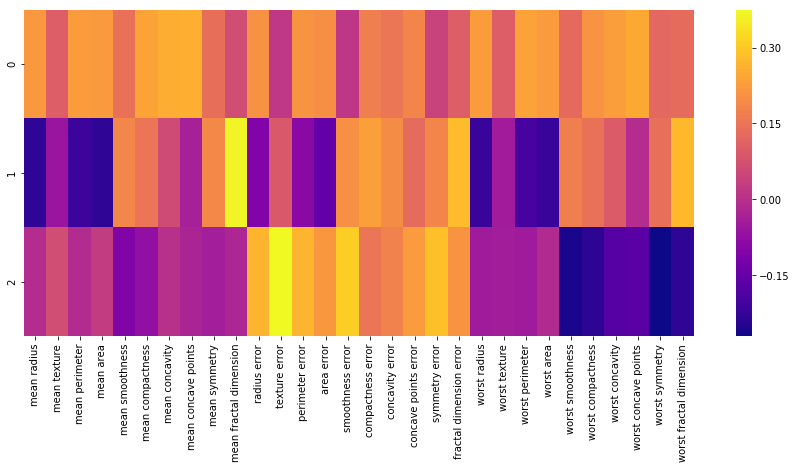

In [47]:
plt.figure(figsize=(15,6))
sns.heatmap(df_components, cmap='plasma')

In [48]:
# APPLYING LOGISTIC REGRESSION ON PCA DATA

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = pca_data
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
lg = LogisticRegression()

In [54]:
lg.fit(X_train, y_train)

/home/abhijeet/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
pred = lg.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 54   5]
 [  1 111]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.96      0.99      0.97       112

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

